In [1]:
#Mine
import uproot
import pandas as pd
import numpy as np
import boost_histogram as bh
import matplotlib.pyplot as plt
import pickle
import gc
import atlasplots as ap
%matplotlib inline

In [4]:
# #John's
# import numpy as np
# import tensorflow as tf
# import os
# import time
# import sys
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# from datetime import datetime
# import statistics as stat
import ROOT
# now = datetime.utcnow().strftime("%y%m%d%H%M%S")

In [5]:
#importing file as pandas dataframe

version = 'full_v01'
df_evenc = pickle.load(open('/eos/user/k/kyklazek/SWAN_projects/UVic-Photons/photonstudy/TRAININGTEST/data/'+version+'_ec1mil_a.pickle', 'rb'))
                                                         # in file name: 'e' means even, 'c' means converted, 
                                                         # '1mil' is 1 million events, 
                                                         # 'a' means its the *first* 1mil events of the larger file

In [6]:
import hist
from hist import Hist

In [8]:
binedgesETA = [0,0.6,0.8,1.15,1.37,1.52,1.81,2.01,2.37]
binedgesET = [0,25,30,35,40,45,50,60,80,100,120,200,500,10000,1000000000]

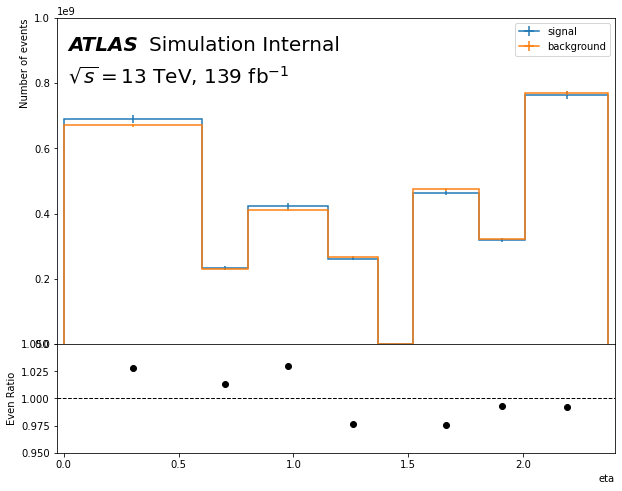

In [11]:
#PLOTTING ETA SIGNAL and BKG

#my code to make boost histos:      
df_evenc['abs_eta']=abs(df_evenc.y_eta)
bh_evensigETA = ap.makebhvar(df_evenc,'abs_eta',binedgesETA,boolslice=df_evenc.y_isTruthMatchedPhoton,weightname='finalWeight')
bh_evenbkgETA = ap.makebhvar(df_evenc,'abs_eta',binedgesETA,boolslice=~df_evenc.y_isTruthMatchedPhoton,weightname='finalWeight')
#for ap.makebhvar, see https://github.com/kyranks/photon-study/blob/3254227af9e634d75844145f44b21079056b1b1c/atlasplots.py#L111

#from heather's code
h1 = Hist(bh_evensigETA)
h2 = Hist(bh_evenbkgETA)
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False,figsize=(10,8), gridspec_kw={'height_ratios': [3, 1]})
axes_dict = {"main_ax": axs[0], "ratio_ax": axs[1]}
main_ax_artists, sublot_ax_arists = h1.plot_ratio(
    h2,
    rp_ylabel=r"Even Ratio",
    rp_num_label="signal",
    rp_denom_label="background",
    rp_uncert_draw_type="bar",  # line or bar
    ax_dict = axes_dict
)

top = 1e9
bottom = 0; 
left = -0.03; right = 2.4
axs[0].set_xlabel("")
axs[1].set_xlabel("eta",position=(1,1),horizontalalignment='right')
axs[0].set_ylabel("Number of events",position=(0,1),horizontalalignment='right')
axs[0].legend()


axs[0].set_ylim(bottom=bottom); axs[0].set_ylim(top=top); 
axs[0].set_xlim(left=left); axs[0].set_xlim(right=right)
axs[1].set_xlim(left=left); axs[1].set_xlim(right=right)
axs[1].set_ylim(bottom=0.95); axs[1].set_ylim(top=1.05)

axs[0].text((right-left)*0.02+left, (top-bottom)*0.9+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
axs[0].text((right-left)*0.165+left, (top-bottom)*0.9+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
axs[0].text((right-left)*0.02+left, (top-bottom)*0.8+bottom, r'$\sqrt{s} =$'+'13 TeV, 139 fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')

#configures the size of gap between ratio and main plot
fig.subplots_adjust(hspace=0)

# fig.savefig(infolder+'Eiso_ratio_truthFiducail_recoPassOverFail.pdf',format='pdf')

## Question to answer is: Why are there no/very small uncertainties in the ratio subplot?